In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pickle

%matplotlib inline

In [2]:
with open('../saved-experiments/two_spirals_descent_dimensionality.pkl', 'rb') as handle:
    depth_experiment, depth_pars = pickle.load(handle)
    
with open('../saved-experiments/two_spirals_descent.pkl', 'rb') as handle:
    width_experiment, width_pars = pickle.load(handle)

In [3]:
def eff_dim(x, s = 0.1):
    return np.sum(x / (x + s))

def parse_lists(rep_full_list):
    ed_list = []
    fl_list = []
    for losses_list, eigs_list, _ in rep_full_list:
        eff_dim_arr = np.array([eff_dim(ee, s = 50.) for ee in eigs_list])
        final_loss = [l[-1] for l in losses_list]

        ed_list.append(eff_dim_arr)
        fl_list.append(final_loss)

    ed_list = np.array(ed_list)
    fl_list = np.array(fl_list)
    tl_list = np.array([ee[-1] for ee in rep_full_list])
    
    return ed_list, fl_list, tl_list

In [4]:
depth_lists = parse_lists(depth_experiment)
width_lists = parse_lists(width_experiment)

/home/wesley/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/wesley/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:5285: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
/home/wesley/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:5286: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
/home/wesley/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:5289: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice
/home/wesley/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:5291: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]


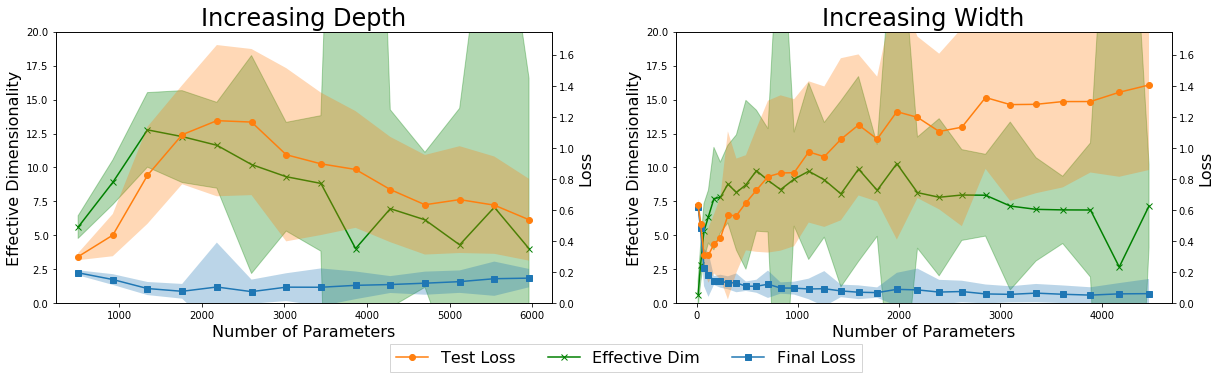

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

ed_list, fl_list, tl_list = depth_lists[0], depth_lists[1], depth_lists[2]

l2, = ax[0].plot(depth_pars, ed_list.mean(0), label = 'Effective Dim', color = 'green', marker='x')
ax[0].fill_between(depth_pars, ed_list.mean(0) - 2 * ed_list.std(0), ed_list.mean(0) + 2*ed_list.std(0), alpha = 0.3,
               color='green')
ax[0].set_ylabel('Effective Dimensionality', fontsize = 16)
ax[0].set_ylim((0, 20))

ax2 = ax[0].twinx()
l3, = ax2.plot(depth_pars, fl_list.mean(0), label = 'Final Loss', marker = 's')
ax2.fill_between(depth_pars, fl_list.mean(0) - 2 * fl_list.std(0), fl_list.mean(0) + 2*fl_list.std(0), alpha = 0.3)

l1, = ax2.plot(depth_pars, tl_list.mean(0), label = 'Test Loss', marker='o')
ax2.fill_between(depth_pars, tl_list.mean(0) - 2 * tl_list.std(0), tl_list.mean(0) + 2*tl_list.std(0), alpha = 0.3)
ax2.set_ylabel('Loss', fontsize = 16)
#ax2.legend()

ax[0].set_xlabel('Number of Parameters', fontsize = 16)
ax[0].set_title('Increasing Depth', fontsize = 24)
ax2.set_ylim((0, 1.75))
lines = [l1, l2, l3]
# 
# ax2.legend(lines, [l.get_label() for l in lines], loc="upper right",
#           fontsize=16)

ed_list, fl_list, tl_list = width_lists[0], width_lists[1], width_lists[2]

l4, = ax[1].plot(width_pars, ed_list.mean(0), label = 'Effective Dim', color = 'green', marker = 'x')
ax[1].fill_between(width_pars, ed_list.mean(0) - 2 * ed_list.std(0), ed_list.mean(0) + 2*ed_list.std(0), alpha = 0.3,
               color='green')
ax[1].set_ylabel('Effective Dimensionality', fontsize = 16)
ax[1].set_ylim((0, 20))

ax2 = ax[1].twinx()
l5, = ax2.plot(width_pars, fl_list.mean(0), label = 'Final Loss', marker = 's')
ax2.fill_between(width_pars, fl_list.mean(0) - 2 * fl_list.std(0), fl_list.mean(0) + 2*fl_list.std(0), alpha = 0.3)

l6, = ax2.plot(width_pars, tl_list.mean(0), label = 'Test Loss', marker = 'o')
ax2.fill_between(width_pars, tl_list.mean(0) - 2 * tl_list.std(0), tl_list.mean(0) + 2*tl_list.std(0), alpha = 0.3)
ax2.set_ylabel('Loss', fontsize = 16)
#ax2.legend()
ax2.set_ylim((0, 1.75))
ax[1].set_xlabel('Number of Parameters', fontsize = 16)
ax[1].set_title('Increasing Width', fontsize = 24)

# lines = [l4, l5, l6]
# ax[1].legend(lines, [l.get_label() for l in lines], loc="upper right",
#           fontsize=16)
ax[0].legend(handles = lines , labels=[l.get_label() for l in lines],loc="upper center",
             bbox_to_anchor=(1.15, -0.12),fancybox=False, shadow=False, ncol=3,
            fontsize=16)
fig.subplots_adjust(wspace=0.25, hspace=50)
plt.savefig('../saved-experiments/two_spirals_width_depth.pdf', bbox_inches="tight")